In [1]:
import mplfinance as mpf
import requests
import pandas as pd
import re
import time


import plotly.graph_objects as go
import plotly.subplots as ms
import talib
import matplotlib.pyplot as plt     # 점찍기용


import matplotlib.pyplot as plt    # 히트맵용
import seaborn as sns              # 히트맵용
import numpy as np
from pandas import Series, DataFrame

In [2]:
test1 = pd.read_csv('017390.KS.csv', encoding='cp949')
test1

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,94000.0,94400.0,93700.0,93700.0,69846.898438,158
1,2018-01-03,93700.0,94900.0,93700.0,93700.0,69846.898438,169
2,2018-01-04,94700.0,94700.0,93700.0,93700.0,69846.898438,218
3,2018-01-05,93700.0,93900.0,92900.0,93400.0,69623.273438,458
4,2018-01-08,93400.0,93700.0,93200.0,93400.0,69623.273438,721
...,...,...,...,...,...,...,...
1307,2023-04-24,456000.0,456500.0,327500.0,327500.0,327500.000000,23778
1308,2023-04-25,229500.0,229500.0,229500.0,229500.0,229500.000000,23470
1309,2023-04-26,161000.0,161000.0,161000.0,161000.0,161000.000000,19429
1310,2023-04-27,112700.0,121600.0,112700.0,112700.0,112700.000000,1912767


In [3]:
# date, close, volume만 남기기

test1 = test1[['Date', 'Close', 'Volume']]
test1

,Date,Close,Volume
0,2018-01-02,93700.0,158
1,2018-01-03,93700.0,169
2,2018-01-04,93700.0,218
3,2018-01-05,93400.0,458
4,2018-01-08,93400.0,721
...,...,...,...
1307,2023-04-24,327500.0,23778
1308,2023-04-25,229500.0,23470
1309,2023-04-26,161000.0,19429
1310,2023-04-27,112700.0,1912767


In [4]:
test2 = pd.read_csv('게시글_017390.csv', encoding='cp949')
test2

,날짜,게시글
0,2019-11-11,1
1,2019-11-13,1
2,2019-12-06,1
3,2019-12-16,1
4,2019-12-22,1
...,...,...
486,2023-04-27,2210
487,2023-04-28,1115
488,2023-04-29,113
489,2023-04-30,113


In [5]:
test1.index = pd.DatetimeIndex(test1['Date'])
test1

,Date,Close,Volume
Date,,,
2018-01-02,2018-01-02,93700.0,158
2018-01-03,2018-01-03,93700.0,169
2018-01-04,2018-01-04,93700.0,218
2018-01-05,2018-01-05,93400.0,458
2018-01-08,2018-01-08,93400.0,721
...,...,...,...
2023-04-24,2023-04-24,327500.0,23778
2023-04-25,2023-04-25,229500.0,23470
2023-04-26,2023-04-26,161000.0,19429


In [6]:
test2.index = pd.DatetimeIndex(test2['날짜'])
test2

,날짜,게시글
날짜,,
2019-11-11,2019-11-11,1
2019-11-13,2019-11-13,1
2019-12-06,2019-12-06,1
2019-12-16,2019-12-16,1
2019-12-22,2019-12-22,1
...,...,...
2023-04-27,2023-04-27,2210
2023-04-28,2023-04-28,1115
2023-04-29,2023-04-29,113


In [7]:
# https://ddaaadd.tistory.com/154

m = test1.join(test2)

m

,Date,Close,Volume,날짜,게시글
Date,,,,,
2018-01-02,2018-01-02,93700.0,158,NaN,NaN
2018-01-03,2018-01-03,93700.0,169,NaN,NaN
2018-01-04,2018-01-04,93700.0,218,NaN,NaN
2018-01-05,2018-01-05,93400.0,458,NaN,NaN
2018-01-08,2018-01-08,93400.0,721,NaN,NaN
...,...,...,...,...,...
2023-04-24,2023-04-24,327500.0,23778,2023-04-24,192.0
2023-04-25,2023-04-25,229500.0,23470,2023-04-25,470.0
2023-04-26,2023-04-26,161000.0,19429,2023-04-26,860.0


In [8]:
m.head(20)

,Date,Close,Volume,날짜,게시글
Date,,,,,
2018-01-02,2018-01-02,93700.0,158,NaN,NaN
2018-01-03,2018-01-03,93700.0,169,NaN,NaN
2018-01-04,2018-01-04,93700.0,218,NaN,NaN
2018-01-05,2018-01-05,93400.0,458,NaN,NaN
2018-01-08,2018-01-08,93400.0,721,NaN,NaN
2018-01-09,2018-01-09,93400.0,134,NaN,NaN
2018-01-10,2018-01-10,93300.0,443,NaN,NaN
2018-01-11,2018-01-11,93500.0,216,NaN,NaN
2018-01-12,2018-01-12,93400.0,157,NaN,NaN


In [9]:
m = m.rename(columns={'날짜': 'naver_date', '게시글': 'Post'})

In [10]:
heatmap_data = m[["Close", "Volume", "Post"]]

<Axes: title={'center': '017390.KS'}>

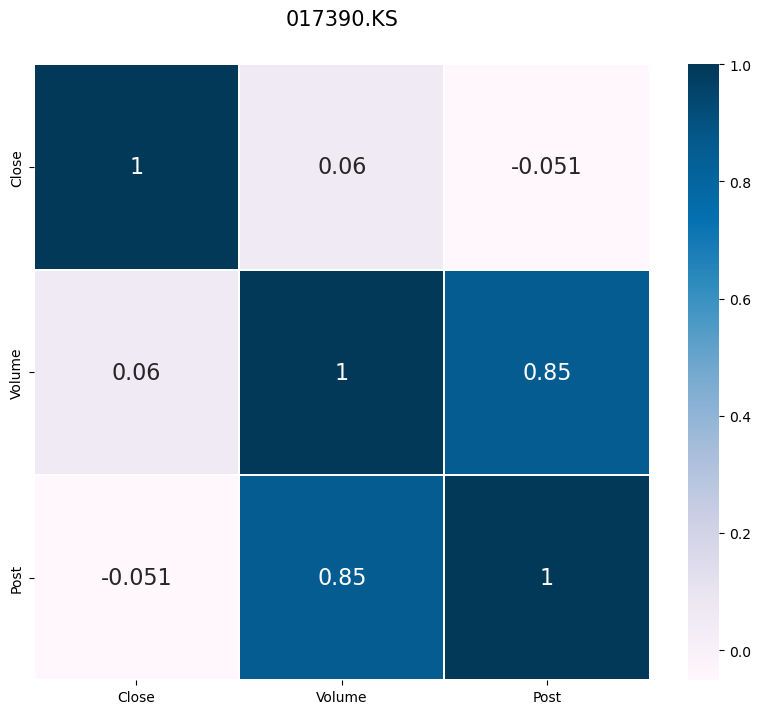

In [11]:
colormap = plt.cm.PuBu
plt.figure(figsize=(10, 8))
plt.title("017390.KS", y = 1.05, size = 15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16})